In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
reeses = cv2.imread('DATA/reeses_puffs.png')


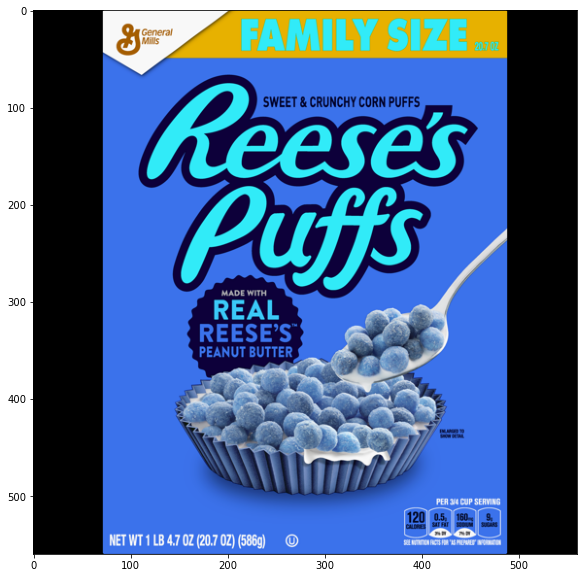

In [5]:
display(reeses)

In [6]:
cereals = cv2.imread('DATA/many_cereals.jpg',0)

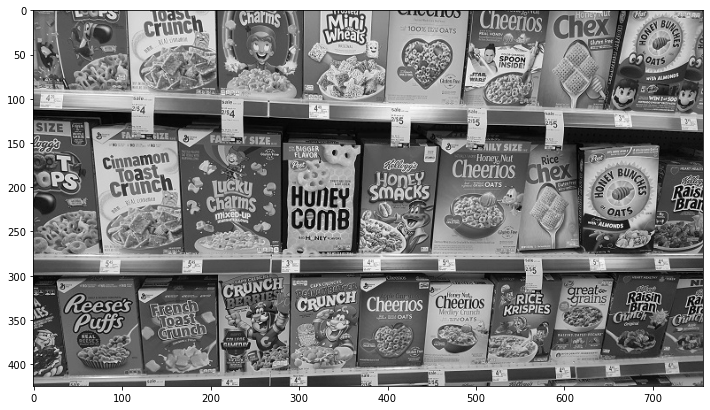

In [7]:
display(cereals)

In [8]:
orb = cv2.ORB_create()

In [9]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [11]:
matches = bf.match(des1,des2)

In [12]:
len(matches)

142

In [13]:
matches = sorted(matches,key=lambda x:x.distance)

In [14]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

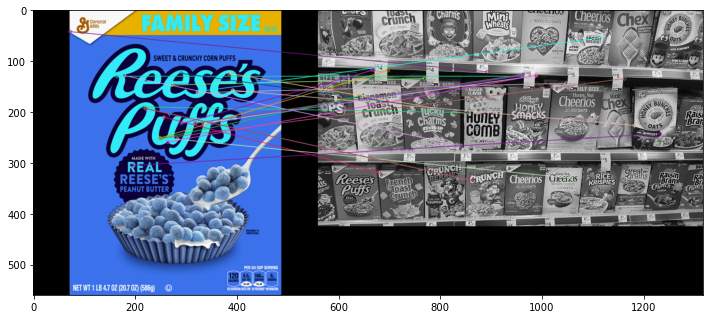

In [15]:
display(reeses_matches)

In [59]:
sift = cv2.SIFT_create()

In [60]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [61]:
bf = cv2.BFMatcher()

In [62]:
des1

array([[51.,  7.,  0., ...,  4.,  2.,  0.],
       [15.,  0.,  0., ..., 11.,  2.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [60.,  5.,  0., ...,  0.,  0.,  0.],
       [29.,  0.,  0., ...,  0.,  0.,  0.],
       [44.,  0.,  0., ...,  0.,  1.,  1.]], dtype=float32)

In [63]:
matches = bf.knnMatch(des1,des2,k=2)

In [64]:
good = []
for match1,match2 in matches:
    if match1.distance <0.75*match2.distance:
        good.append([match1])
        

In [65]:
len(good), len(matches)

(80, 1501)

In [66]:
 sift_matches = cv2.drawMatchesKnn(reeses,kp1, cereals,kp2,good,None,flags=2)

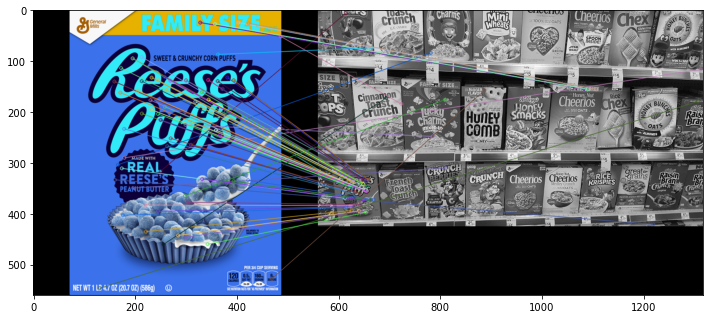

In [67]:
display(sift_matches)

In [68]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [69]:
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [70]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [71]:
matches = flann.knnMatch(des1,des2, k=2)

In [72]:
matchesMask = [[0,0] for i in range(len(matches))]

In [73]:
for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [89]:
draw_params = dict(matchColor=(255,0,0),
                  singlePointColor=(255,0,255),
                   matchesMask=matchesMask,
                   flags = 0)

In [90]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

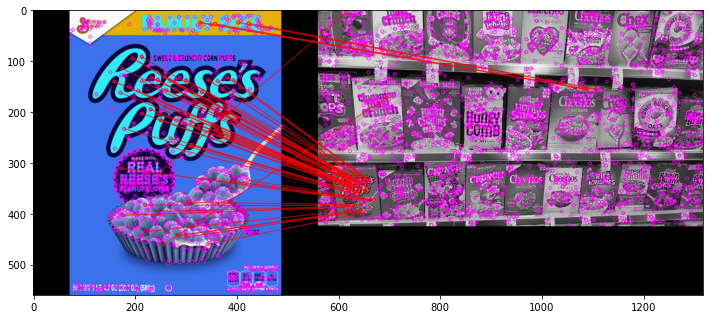

In [91]:
display(flann_matches)

In [41]:
matches

((<DMatch 000001E37A3495B0>, <DMatch 000001E31B00C670>),
 (<DMatch 000001E31B00CE10>, <DMatch 000001E37A367310>),
 (<DMatch 000001E37A367150>, <DMatch 000001E37A3670B0>),
 (<DMatch 000001E31B054990>, <DMatch 000001E31B054150>),
 (<DMatch 000001E31B0548D0>, <DMatch 000001E31B054090>),
 (<DMatch 000001E31B054570>, <DMatch 000001E31B054B50>),
 (<DMatch 000001E31B054A90>, <DMatch 000001E31B054A70>),
 (<DMatch 000001E31B054170>, <DMatch 000001E31B054670>),
 (<DMatch 000001E31B054A10>, <DMatch 000001E31B054210>),
 (<DMatch 000001E31B054930>, <DMatch 000001E31B054A50>),
 (<DMatch 000001E31B054810>, <DMatch 000001E31B054950>),
 (<DMatch 000001E31B054510>, <DMatch 000001E31B0541D0>),
 (<DMatch 000001E31B054910>, <DMatch 000001E31B054070>),
 (<DMatch 000001E31B054870>, <DMatch 000001E31B0542B0>),
 (<DMatch 000001E31B0548B0>, <DMatch 000001E31B0549F0>),
 (<DMatch 000001E31B054C50>, <DMatch 000001E31B054C30>),
 (<DMatch 000001E31B054CB0>, <DMatch 000001E31B054C90>),
 (<DMatch 000001E31B054B90>, <D